# Clustering Assignment P4
This Jupyter notebook shows how the GygiDataset clusters using the K-means method with Euclidean distance. Two visualizations are made for the raw unclustered (but classified) data. Then clustering is done and two more visualizations are shown.

Load textures and cochleogram data 
---------------------------------------

In [1]:
import numpy as np
import os
npzfilename=os.path.join('airplan','rawFeatures.npz')
dataraw= np.load(npzfilename) 
dataraw=dataraw['arr_0'].item()
dataraw.keys()

['Tf', 'E', 'Pf', 'Ts', 'Ps']

Plotting
---------

Activating plotting magic


In [2]:
#Do not plot inline because of 3d plots
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


Load the PTN data
-------------------

The PTN data is the data that is analyzed and clustered. PTNdata contains the energy of pulse, tone, and noise sounds and their corresponding frequencies.

In [3]:
npzfilename=os.path.join('AnalysisOfGygiDataset.npz')
PTNdata= np.load(npzfilename) 
PTNdata=PTNdata['arr_0'].item()
#PTNdata.keys()

## Example visualization of the raw unclustered (but classified) data

This shows a 2d plot of P vs T, the N data is not displayed. Each point is classified and is given a marker (circle, square or triangle) to show to which they belong.

In [58]:
#Made by R. van Elburg. Used as an example.

f=plt.figure(figsize=(16,6,))
ax = f.add_subplot(1,1,1)
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']

#ax.plot(xs, ys,'.' )

for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange], c=typecolor, marker=typemarker,s=48)

for label, x, y in zip(PTNdata['labels'], xs,ys):
    ax.text(x, y, label[:3], None)    

ax.set_xlabel('P value')
ax.set_ylabel('N value')
figtext(.05, .03, "The unclustered data has been classified. Red datapoints are noise, blue datapoints are tones and green datapoints are pulse sounds.")
plt.show()

# Visualization 1

Display the raw, unclustered, classified data in a 3d plot. Again each datapoint is given a marker to show to which group (pulse, tone, noise) they belong to. This 3d plot is interactive, giving you the best view of the data when you start moving the view.

In [28]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
#for a 3d plot the projection needs to be set to 3d
ax = fig.add_subplot(111, projection='3d')

#xs, ys and zs are set to pulse, tone and noise data values respectively
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']
zs=PTNdata['N_logsumE_off_FS']

#for each data point the data is read and plotted with the respective colour
for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange],zs[typerange], c=typecolor, marker=typemarker)

#Defines the axis labels on the plot
ax.set_xlabel('Pulse')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')
figtext(.05, .03, "The unclustered data has been classified. Red datapoints are noise, blue datapoints are tones and green datapoints are pulse sounds.")

#used to show the plot in output
plt.show()

# Visualization 2

Histogram visualiasion of raw input data. We use this to see the spread of the data.

In [1]:
import pylab as P

#set the values for the histogram 
P.hist( [xs,ys,zs], 10,  histtype='bar', color=['red', 'green', 'blue'],
label=['Pulse', 'Tone', 'Noise'])

P.title('Histogram Representation of raw noise data')
P.ylabel('% Occurances')
P.xlabel('LogSum')

#display legend of upper left of plot area
P.legend(loc='upper left')

#show the plot
P.show()

NameError: name 'xs' is not defined

# Clustering

Adding k-means algorithm from scipy for pulse vs tone data. The data is loaded in a numpy array which is needed for the kmeans algorithm. 3 clusters are selected since we would like to see 3 clusters being formed, one for each type of sound (pulse, tone, noise).

In [25]:
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq

#xs=PTNdata['P_logsumE_off_FS']
#ys=PTNdata['T_logsumE_off_FS']
#zs=PTNdata['N_logsumE_off_FS']

#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,3)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)

# Visualization 1

A 2d plot of P vs T with clustered datapoints. The noise data is not taken into account with this 2d plot. The colors have been changed since the clusters start forming randomly at first, so the clusters also finalize in a random order, which can make the colors inconsistent.

In [27]:
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
plot(data[idx==0,0],data[idx==0,1],'mo',
     data[idx==1,0],data[idx==1,1],'yo',
     data[idx==2,0],data[idx==2,1],'co') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=10)
P.xlabel('P')
P.ylabel('T')
P.xlim([-14,2])
P.ylim([-8,1])
figtext(.05, .03, "The clustered data visualized.")
show()

# Visualization 2

A 3d plot of the clustered datapoints. The data is imported into a numpy array which is needed for the kmeans algorithm. The clusters start forming in a random order, so the final colors of the markers may not correspond with the first colors the unclustered, classified data had.

In [54]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

#sets the axes to 3d
fig = plt.figure()
ax = Axes3D(fig)

# merge data into one array
data =np.vstack((xs,ys,zs))
data = np.array([xs,ys,zs]).T

#calculate the centeriods 
centroids,_ = kmeans(data,3)

#assign each data point to a group based on the centeriods that they are closet to in distance
idx,_ = vq(data,centroids)

#plot the data values in the 3 seperate clusters
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],'ob')
plot(data[idx==1,0],data[idx==1,1],data[idx==1,2],'or')
plot(data[idx==2,0],data[idx==2,1],data[idx==2,2],'og')

#set axis labels
ax.set_xlabel('Pulse')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')

#plot the centeroids
plot(centroids[:,0],centroids[:,1],centroids[:,2],'sm',markersize=10)
show()

# Discussion

In this section the results of the clustering algorithm are discussed. The images show there are some differences, which can be inconsistent because of the random aspect of the kmeans clustering algorithm. 

The first image shows the clustered datapoints. These datapoints have been clustered in only 2 dimensions.


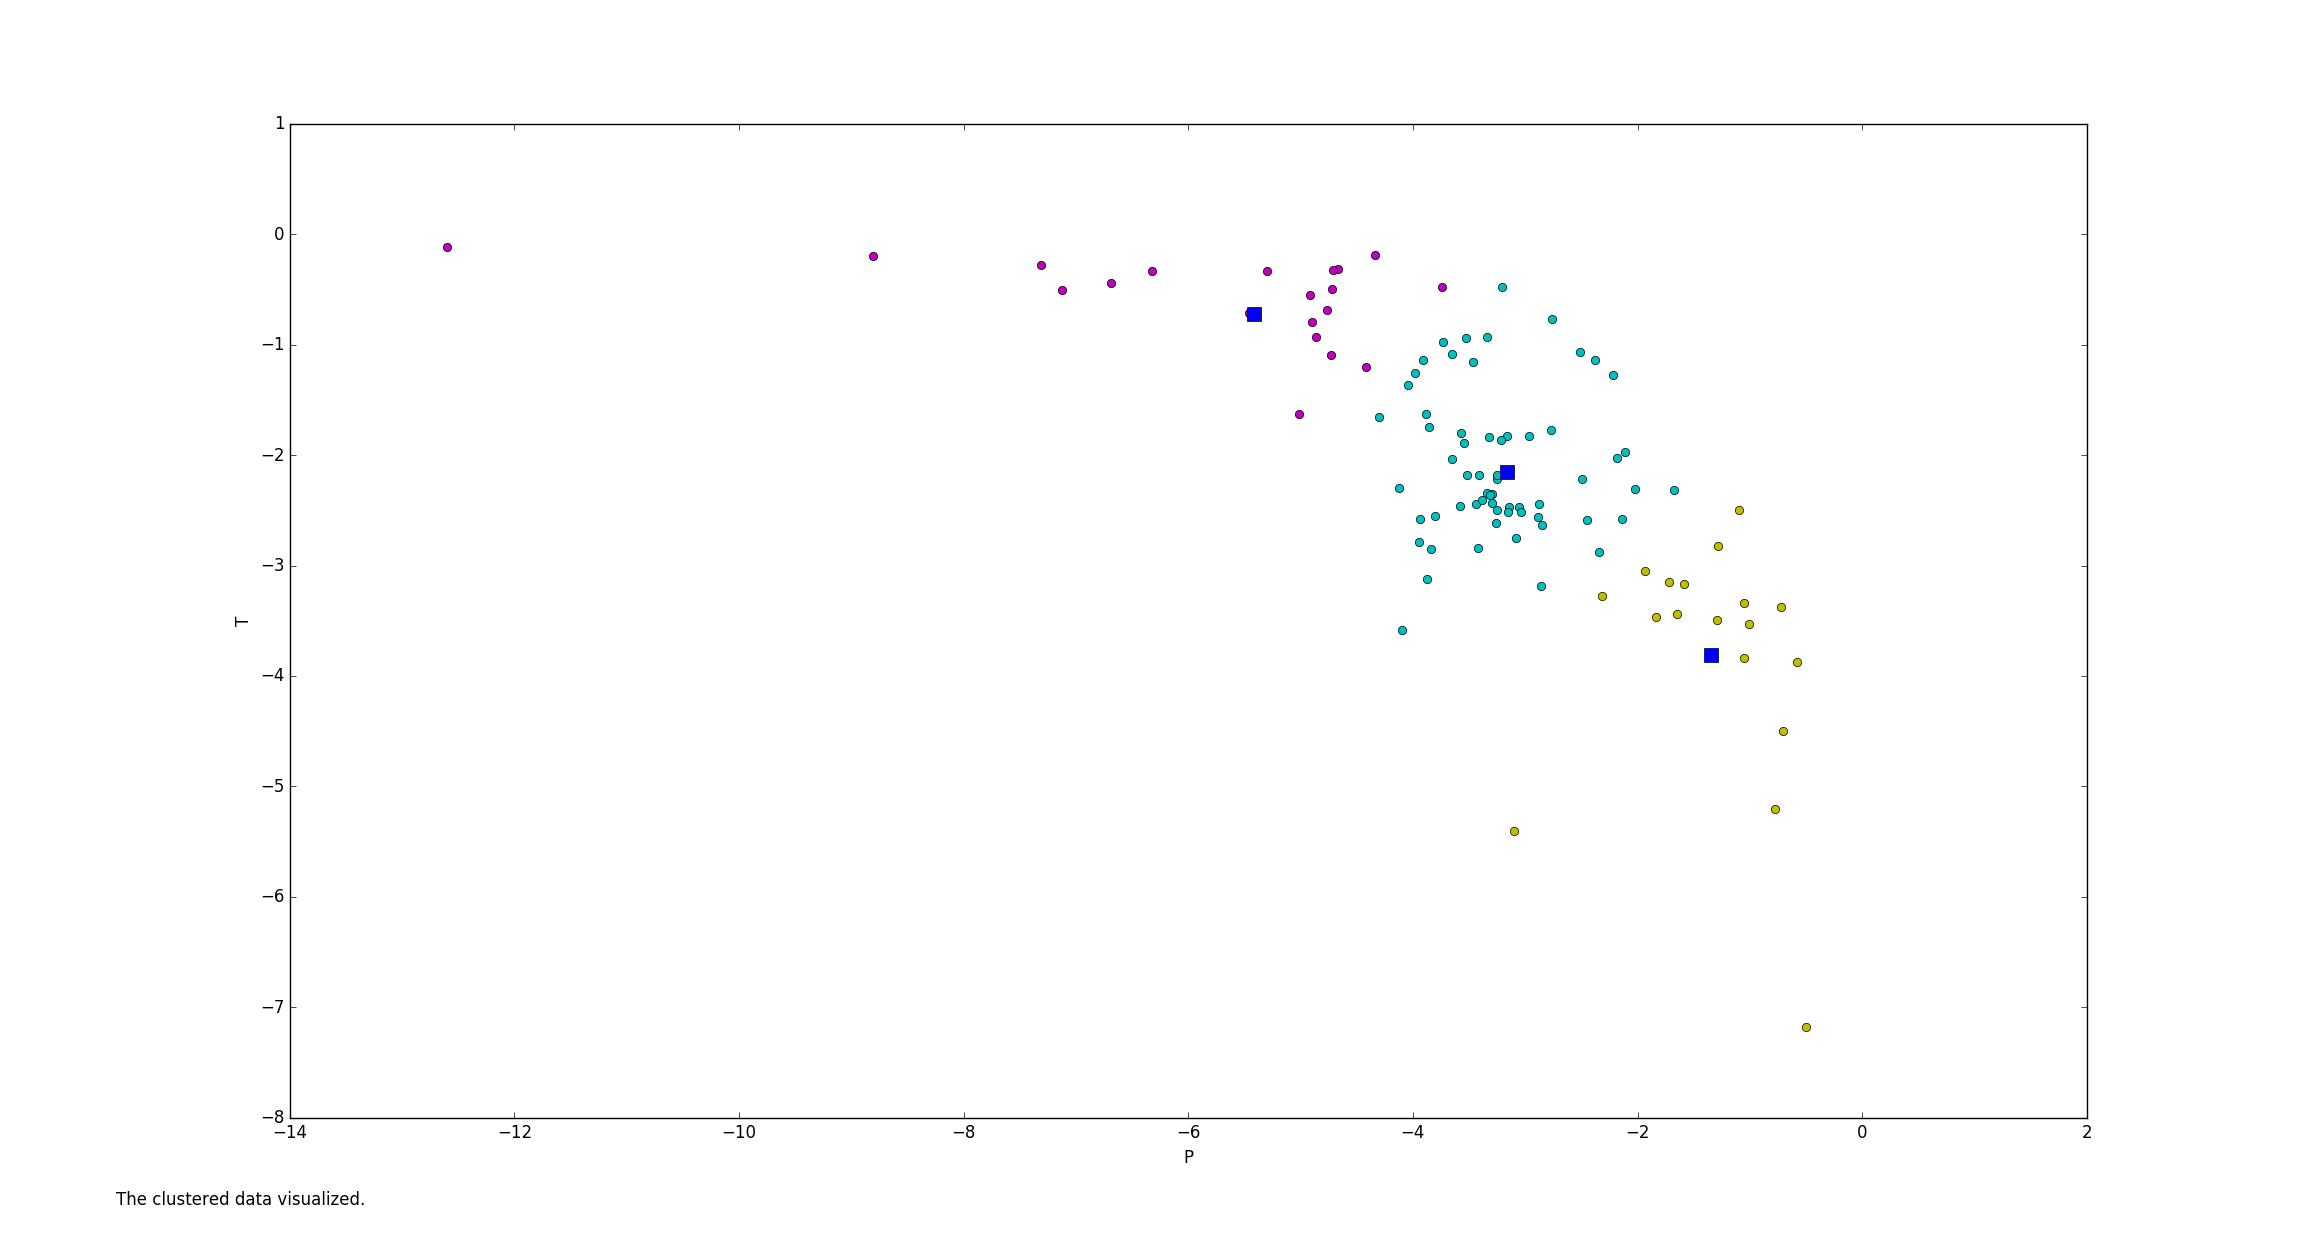

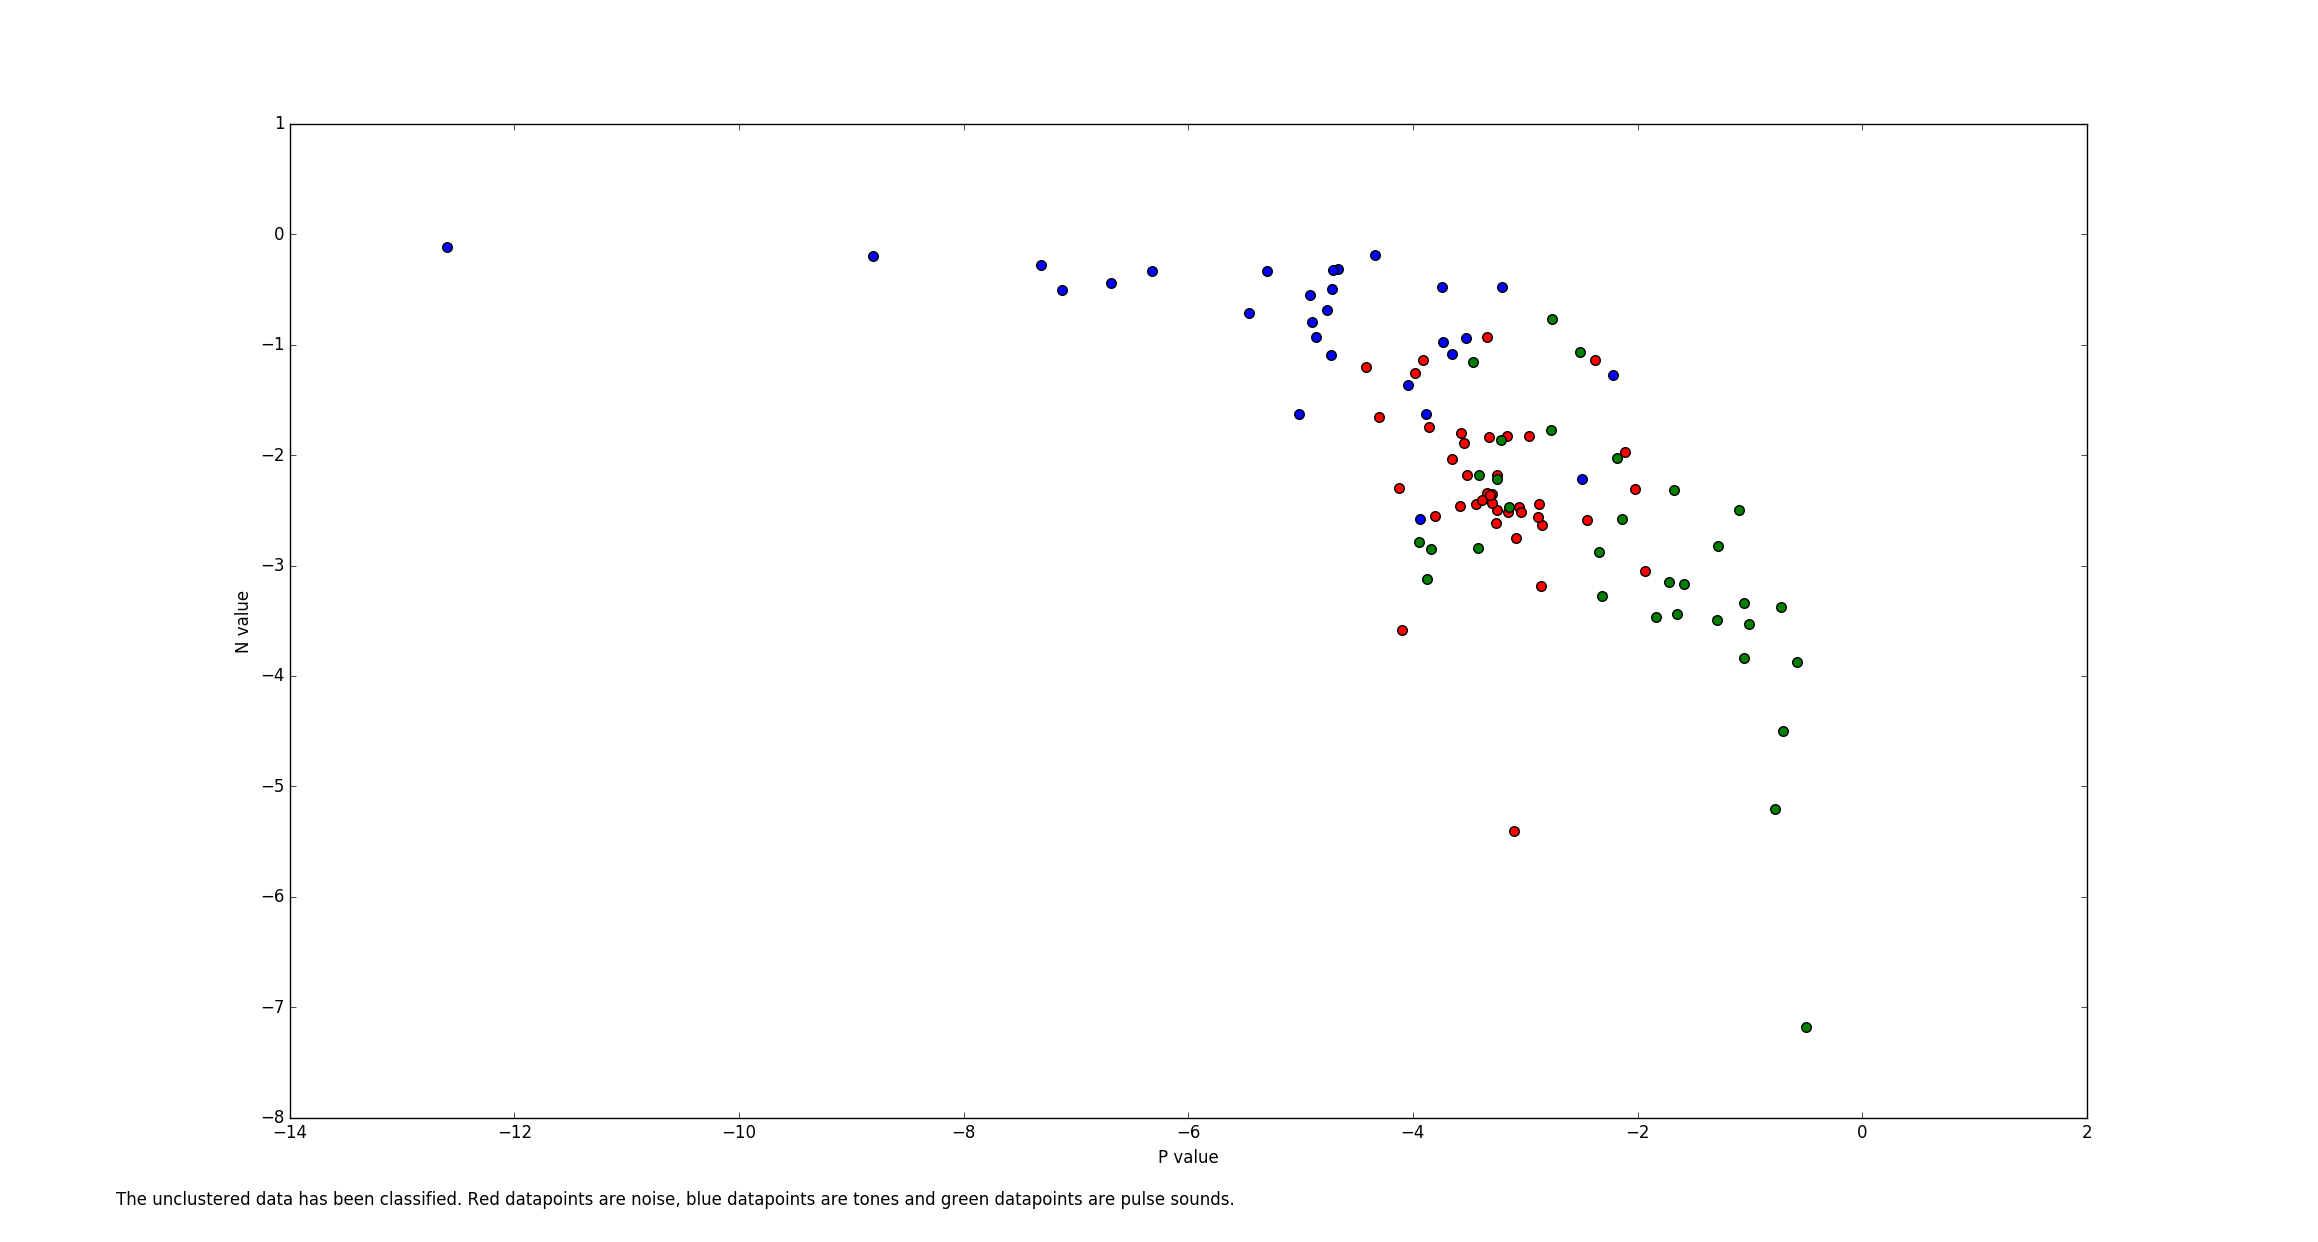

From a 2d image it is hard to draw conclusions on whether a datapoint has been added to the right cluster, we recommend looking at the 3d plot which gives a clearer view.


In [52]:
from IPython.display import Image 
a = Image(filename="clustered.png")
b = Image(filename="classified.png")

print("The first image shows the clustered datapoints. These datapoints have been clustered in only 2 dimensions.")
print("Both images plot P vs T value, one axis has the wrong label.")
display(a,b)

print("From a 2d image it is hard to draw conclusions on whether a datapoint has been added to the right cluster, we recommend looking at the 3d plot which gives a clearer view.")


# 3d clustered vs classified

In this section the different 3d plots are analyzed. There are differences in the assigned class and clusters, which can be noticed easily when quickly switching between the two images.

The first image shows the clustered datapoints in a 3d view, the second shows the classified, but unclustered data in a 3d view.


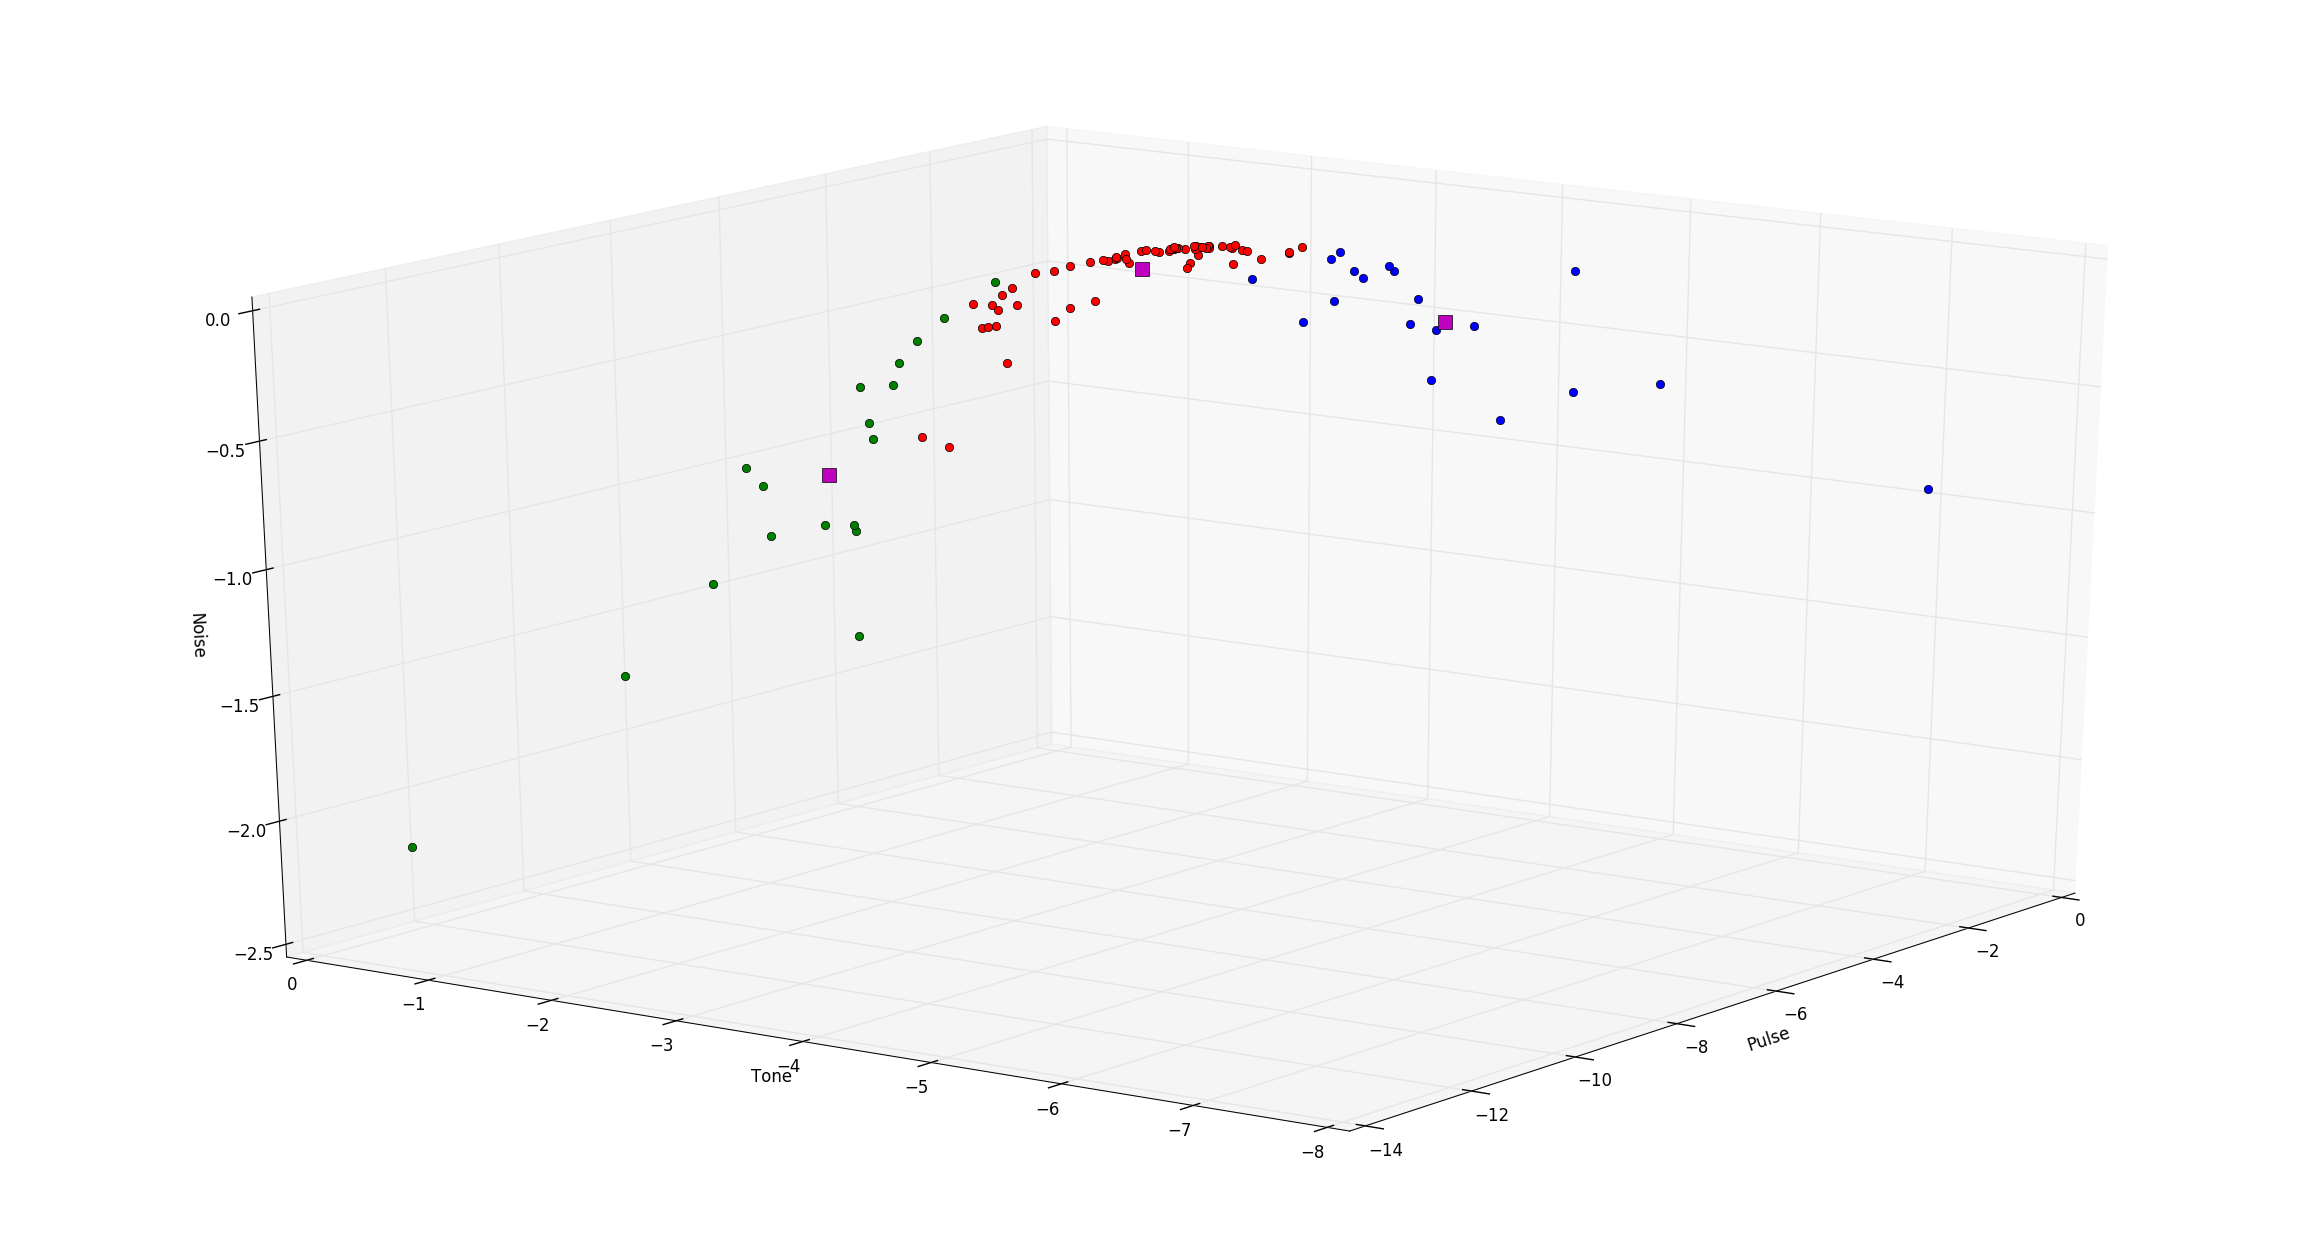

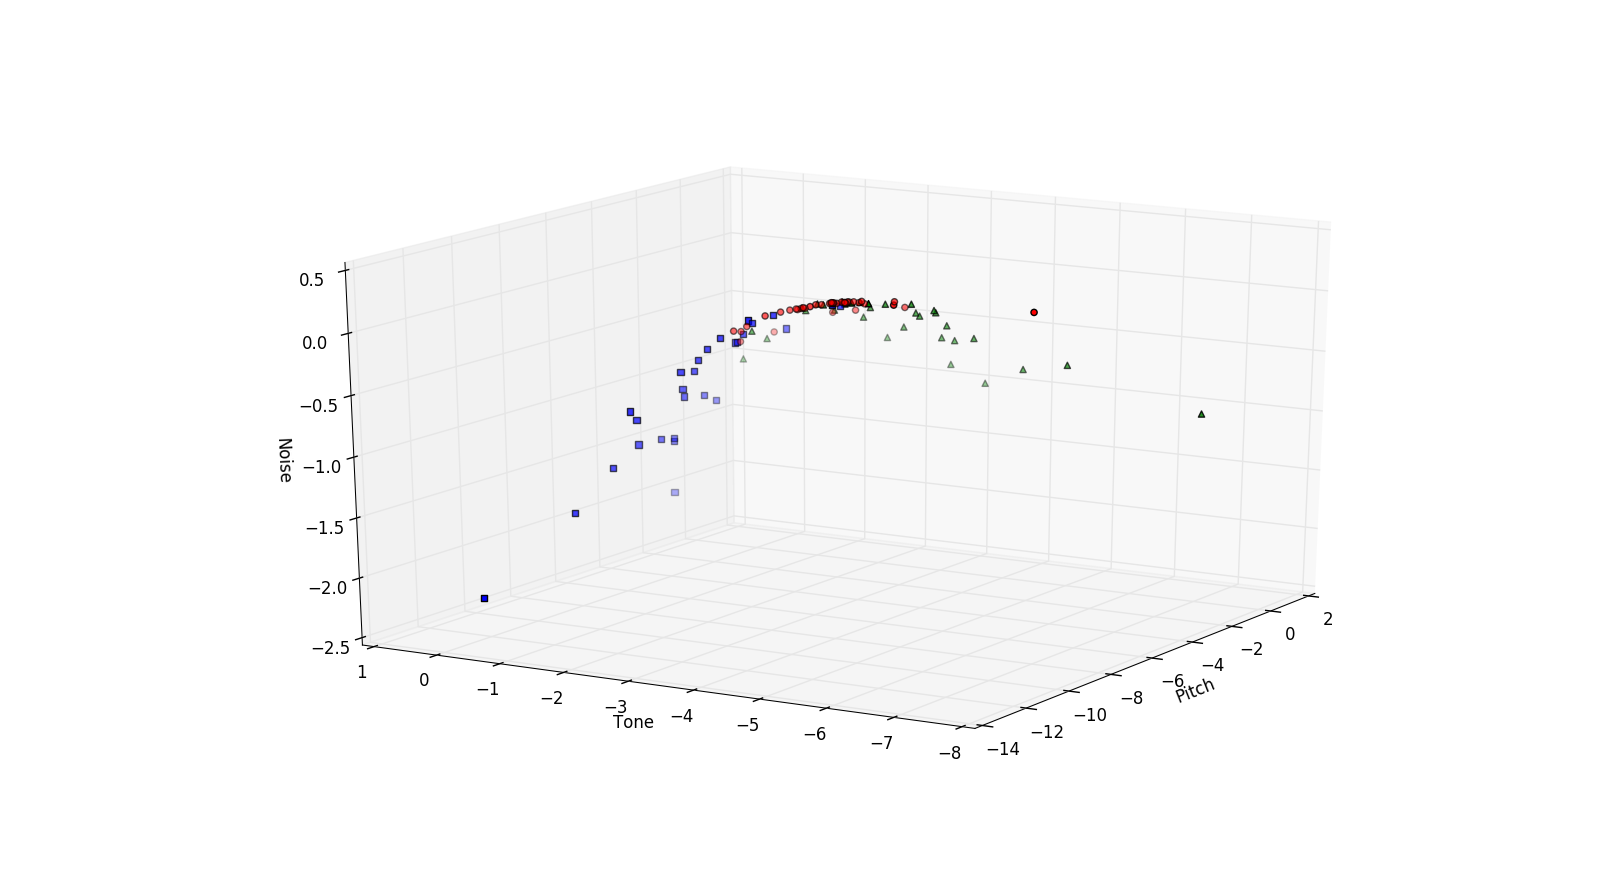

In [57]:
from IPython.display import Image 
a = Image(filename="3dclustered.png")
b = Image(filename="3dclassification.png")

print("The first image shows the clustered datapoints in a 3d view, the second shows the classified, but unclustered data in a 3d view.")

display(a,b)

# Discussion of 3d plots

The 3d plots show a bit more information than the 2d ones, since the 'noise' dimension is lost in the 2d plots. The graphs look very similar, however there are a few datapoints which differ. 

The one that stands out the most is the datapoint called 'bubble', which is classified as noise, however, when clustered it is added to the pulse cluster.



# Comparison with manhattan distance calculation


The P vs T plot clustered data points where the distance has been calculated using the manhattan method.


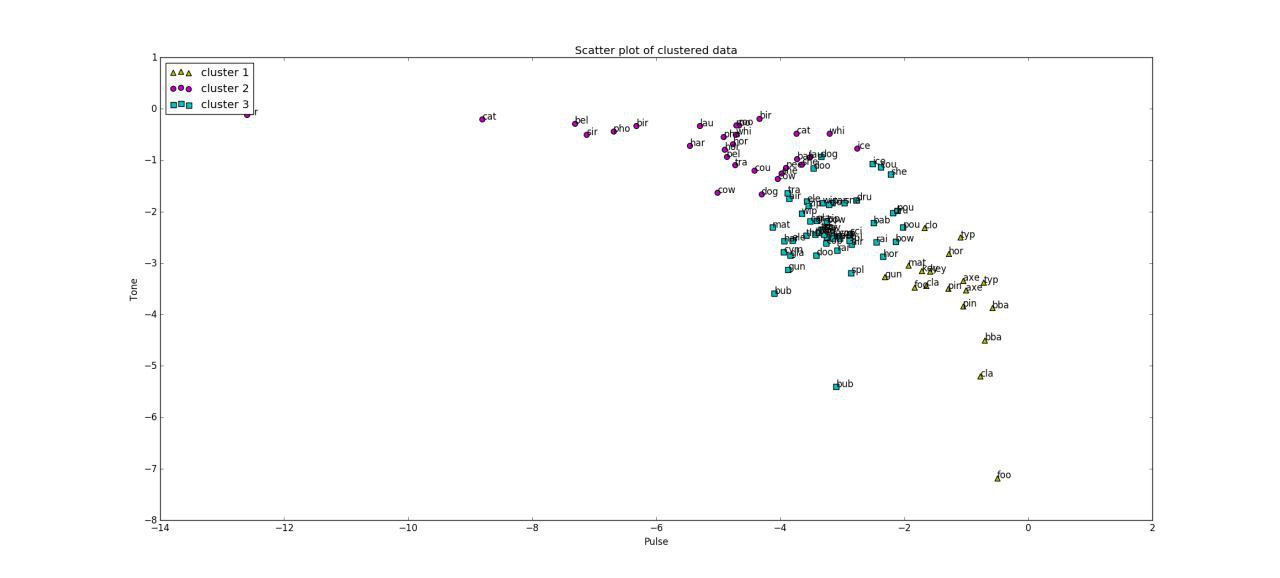

In [9]:
from IPython.display import Image 
print("The P vs T plot clustered data points where the distance has been calculated using the manhattan method.")
Image(filename="manhatten.jpg")

Comparing the manhattan distance method and the euclidean distance method does show some differences. The outer most datapoints are quite 'equal' (they are assigned to the same cluster) in both distance calculation methods.

The differences occur between the middle and outer clusters. When using the manhattan method, more datapoints from the center noise cluster change to the upper tone cluster.

# Sensor city challenge

Clustering is a method which can be used for one of the assignments of the sensor city challenge. The sensor nodes have a geographical location and get a certain value based on the amplitude of the siren. Then clustering can be performed with the kmeans algorithm. The cluster means would then represent the locations of the sirens.